# plot_comparison.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 06 November 2023

Purpose: Read in all cases to plot comparisons between them

In [1]:
import sys
sys.path.append("/home/rfrost/LES-utils/")

import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from LESutils import load_full
import seaborn
import cmocean
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap

### Settings

In [2]:
# directory to save figures
figdir = "/home/rfrost/manuscript_plots/"
# simulation to analyze
sims = ["full_step_6", "full_step_9", "full_step_12", "full_step_15"]

# z/zi to plot
height = 0.25

# start and end timesteps
t0 = 576000
t1 = 1152000
# start and end in hours
t0hr = t0 * 0.05 / 3600
t1hr = t1 * 0.05 / 3600
# spacing of output
dt = 1000

# lists to store stats, roll factor, and length scales
s_all, r_all, ls_all = [], [], []
# loop over sims
for sim in sims:
    dnc = f"/home/rfrost/simulations/nc/{sim}/"
    # volumetric stats
    s = xr.open_dataset(f"{dnc}{t0}_{t1}_stats.nc")
    # convert time to hours
    s["time"] = s.time / 3600 + t0hr
    s_all.append(s)

    # roll factor
    r = xr.open_dataset(f"{dnc}rollfactor.nc")
    # convert time to hours
    r["time"] = r.time / 3600 + t0hr
    r_all.append(r)

    # length scales
    ls = xr.open_dataset(f"{dnc}{t0}_{t1}_length_scale_rot.nc")
    # convert time to hours
    ls["time"] = ls.time / 3600 + t0hr
    ls_all.append(ls)

In [3]:
# plotting setup

# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white')

# lists/cmaps for titles and stuff
ug_list = ["6", "9", "12", "15"]
time_colors = ["black", "red", "red", "blue", "blue"]
ug_colors = seaborn.color_palette("flare", 4)
linestyle = ["solid","solid","--","solid","--"]

In [4]:
# find average T_L at hr 9.8333
T_L = (906.23 + 923.55 + 937.68 + 960.66) / 4

tb = -1
tc = 5
td = 11
te = 17
tf = 23

tlmax = max((s_all[0].time-10)*3600/T_L)
tlmin = min((s_all[0].time-10)*3600/T_L)

# normalized times to be plot
jttl = [tb, tc, td, te, tf]
jtall = [abs(((s_all[0].time.values-10)*3600)/T_L - jttl[jt]).argmin() for jt in range(len(jttl))]

In [5]:
# calculate TKE and theta*
for i, s in enumerate(s_all):
    s["tke"] = (1/2) * (s.u_var + s.v_var + s.w_var)
    s["thetastar"] = s.tw_cov_tot[:,0] / s.wstar

## Vertical profiles of heat and momentum fluxes

In [6]:
time = np.linspace(0,16,1152000)
flux = np.empty(len(time))
for i in range(0,720000):
    flux[i] = 0.05
for i in range(720000,936000):
    flux[i] = 0.30
for i in range(936000,1152000):
    flux[i] = 0.05

/tmp/ipykernel_39843/3753711969.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


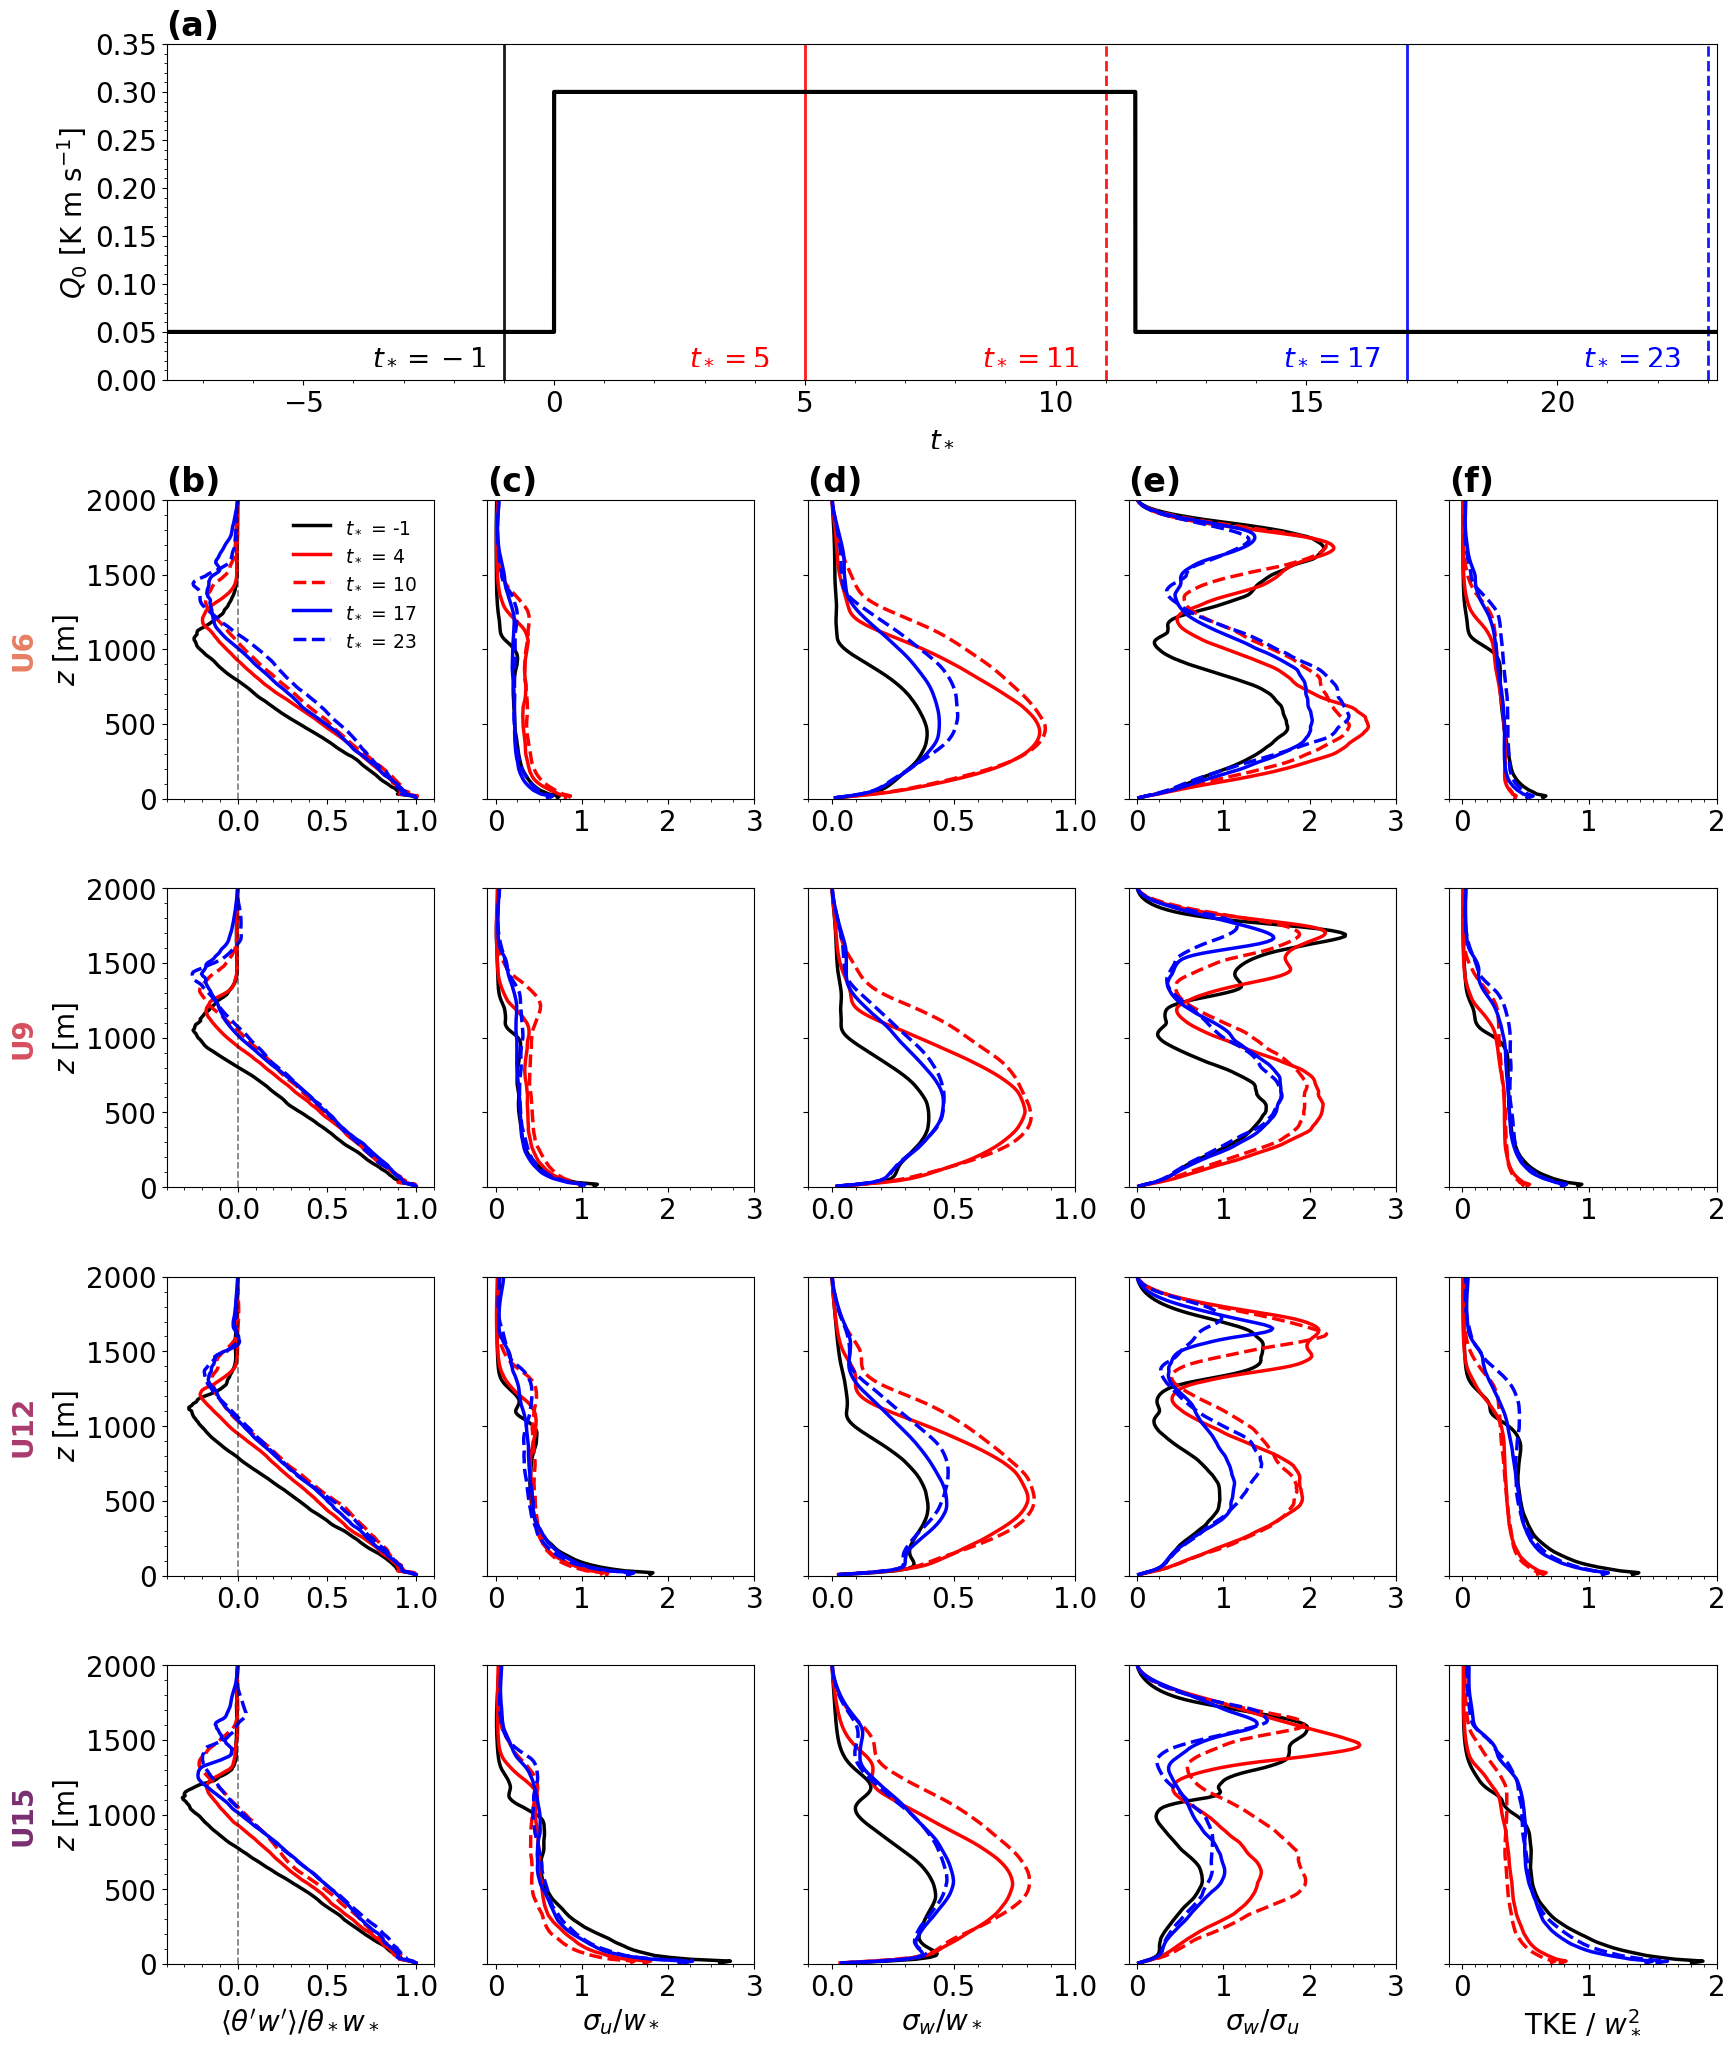

In [7]:
fig = plt.figure(figsize=(20,24))

gs1 = GridSpec(1, 1, bottom=0.74)
ax1 = fig.add_subplot(gs1[:,:])
gs2 = GridSpec(4, 5, top=0.69, bottom=0.08)
ax2 = fig.add_subplot(gs2[0,0])
ax3 = fig.add_subplot(gs2[0,1])
ax4 = fig.add_subplot(gs2[0,2])
ax5 = fig.add_subplot(gs2[0,3])
ax6 = fig.add_subplot(gs2[0,4])
ax7 = fig.add_subplot(gs2[1,0])
ax8 = fig.add_subplot(gs2[1,1])
ax9 = fig.add_subplot(gs2[1,2])
ax10 = fig.add_subplot(gs2[1,3])
ax11 = fig.add_subplot(gs2[1,4])
ax12 = fig.add_subplot(gs2[2,0])
ax13 = fig.add_subplot(gs2[2,1])
ax14 = fig.add_subplot(gs2[2,2])
ax15 = fig.add_subplot(gs2[2,3])
ax16 = fig.add_subplot(gs2[2,4])
ax17 = fig.add_subplot(gs2[3,0])
ax18 = fig.add_subplot(gs2[3,1])
ax19 = fig.add_subplot(gs2[3,2])
ax20 = fig.add_subplot(gs2[3,3])
ax21 = fig.add_subplot(gs2[3,4])

# Q0 time series
ug_list = ["6", "9", "12", "15"]
ax1.plot((time-10)*3600/T_L, flux, lw=3, c="black")
ax1.set_xlim(tlmin,tlmax)
ax1.set_ylim(0,0.35)
# vertical lines
ax1.axvline(x=tb, lw=2, alpha=0.9, ls=linestyle[0], c="black", zorder=0)
ax1.axvline(x=tc, lw=2, alpha=0.9, ls=linestyle[1], c="red", zorder=0)
ax1.axvline(x=td, lw=2, alpha=0.9, ls=linestyle[2], c="red", zorder=0)
ax1.axvline(x=te, lw=2, alpha=0.9, ls=linestyle[3], c="blue", zorder=0)
ax1.axvline(x=tf, lw=2, alpha=0.9, ls=linestyle[4], c="blue", zorder=0)
# text above lines
ax1.text(tb-1.5, 0.025, f"$t_* = {tb}$", ha="center", va="center", c="black")
ax1.text(tc-1.5, 0.025, f"$t_* = {tc}$", ha="center", va="center", c="red")
ax1.text(td-1.5, 0.025, f"$t_* = {td}$", ha="center", va="center", c="red")
ax1.text(te-1.5, 0.025, f"$t_* = {te}$", ha="center", va="center", c="blue")
ax1.text(tf-1.5, 0.025, f"$t_* = {tf}$", ha="center", va="center", c="blue")
# ticks
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
# axis label
ax1.set_xlabel("$t_*$")
ax1.set_ylabel("$Q_0$ [K m s$^{-1}$]")
# title
ax1.set_title("(a)", loc="left")

# normalized heat flux
axes = [ax2, ax7, ax12, ax17]
for i in range(len(jtall)):
    time_values = [s_all[j].time[jtall[i]].values for j in range(4)]
    tw_cov_tot_values = [s_all[j].tw_cov_tot[jtall[i]] for j in range(4)]
    thetastar_values = [s_all[j].thetastar for j in range(4)]
    wstar_values = [s_all[j].wstar for j in range(4)]
    z_values = [s_all[j].z for j in range(4)]
    labels = [f"$t_*$ = {int(((time_values[j]-10)*3600)/T_L)}" for j in range(4)]
    for j in range(4):
        axes[j].plot(tw_cov_tot_values[j] / (thetastar_values[j] * wstar_values[j]).isel(time=jtall[i]), z_values[j], 
                     c=time_colors[i], label=labels[j], lw=2.5, ls=linestyle[i])
        axes[j].set_xlim(-0.4, 1.1)
        axes[j].xaxis.set_minor_locator(MultipleLocator(0.1))

# u variance
axes = [ax3, ax8, ax13, ax18]
for i in range(len(jtall)):
    u_var_values = [s_all[j].u_var_rot[jtall[i]] for j in range(4)]
    wstar_values = [s_all[j].wstar for j in range(4)]
    z_values = [s_all[j].z for j in range(4)]
    for j in range(4):
        axes[j].plot(u_var_values[j] / (wstar_values[j]).isel(time=jtall[i]), z_values[j], 
                     c=time_colors[i], lw=2.5, ls=linestyle[i])
        axes[j].set_xlim(-0.1, 3)
        axes[j].xaxis.set_minor_locator(MultipleLocator(0.25))
        axes[j].xaxis.set_major_locator(MultipleLocator(1))

# w variance
axes = [ax4, ax9, ax14, ax19]
for i in range(len(jtall)):
    w_var_values = [s_all[j].w_var[jtall[i]] for j in range(4)]
    wstar_values = [s_all[j].wstar for j in range(4)]
    z_values = [s_all[j].z for j in range(4)]
    for j in range(4):
        axes[j].plot(w_var_values[j] / (wstar_values[j]).isel(time=jtall[i]), z_values[j], 
                     c=time_colors[i], lw=2.5, ls=linestyle[i])
        axes[j].set_xlim(-0.1, 1)
        axes[j].xaxis.set_minor_locator(MultipleLocator(0.1))
        axes[j].xaxis.set_major_locator(MultipleLocator(0.5))

# w_var / u_var
axes = [ax5, ax10, ax15, ax20]
for i in range(len(jtall)):
    w_var_values = [s_all[j].w_var[jtall[i]] for j in range(4)]
    u_var_values = [s_all[j].u_var_rot[jtall[i]] for j in range(4)]
    z_values = [s_all[j].z for j in range(4)]
    for j in range(4):
        axes[j].plot(w_var_values[j] / u_var_values[j], z_values[j], 
                     c=time_colors[i], lw=2.5, ls=linestyle[i])
        axes[j].set_xlim(-0.1, 3)
        axes[j].xaxis.set_minor_locator(MultipleLocator(0.25))
        axes[j].xaxis.set_major_locator(MultipleLocator(1))

# TKE
axes = [ax6, ax11, ax16, ax21]
for i in range(len(jtall)):
    tke_values = [s_all[j].tke[jtall[i]] for j in range(4)]
    w_var_values = [s_all[j].w_var[132] for j in range(4)]
    z_values = [s_all[j].z for j in range(4)]
    for j in range(4):
        axes[j].plot(tke_values[j] / (wstar_values[j]).isel(time=jtall[i]) ** 2, z_values[j],
                     c=time_colors[i], lw=2.5, ls=linestyle[i])
        axes[j].set_xlim(-0.1,2)
        axes[j].xaxis.set_minor_locator(MultipleLocator(0.1))


for ax in [ax3, ax4, ax5, ax6, ax8, ax9, ax10, ax11, ax13, ax14, ax15, ax16]:
    # ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(0,2000)
for ax in [ax18, ax19, ax20, ax21]:
    ax.set_yticklabels([])
    ax.set_ylim(0,2000)
    
# xaxis labels
ax17.set_xlabel("$\\langle \\theta'w' \\rangle / \\theta_*w_*$")
ax18.set_xlabel("$ \sigma_u / w_*$")
ax19.set_xlabel("$ \sigma_w / w_*$")
ax20.set_xlabel("$ \sigma_w / \sigma_u$")
ax21.set_xlabel("TKE / $w_*^2$")

case = ["6", "9", "12", "15"]
for i, iax in enumerate([ax2, ax7, ax12, ax17]):
    iax.set_ylabel("$z$ [m]")
    iax.set_ylim(0,2000)
    iax.axvline(x=0, ls="--", alpha=0.5, lw=1.25, color="black")
    iax.yaxis.set_minor_locator(MultipleLocator(100))
    iax.yaxis.set_major_locator(MultipleLocator(500))
    iax.text(-1.2, 1000, f"U{case[i]}", 
            rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])

# axis titles
ax2.set_title("(b)", loc="left", c="black")
ax3.set_title("(c)", loc="left", c="black")
ax4.set_title("(d) ", loc="left", c="black")
ax5.set_title("(e)", loc="left", c="black")
ax6.set_title("(f)", loc="left", c="black")

plt.subplots_adjust(hspace=0.3)

ax2.legend(frameon=False, fontsize=13.5, loc="upper right")

plt.tight_layout()

plt.savefig(f"{figdir}mean_profiles.pdf", format="pdf", dpi=300, bbox_inches="tight")

## Cross sections of vertical velocity

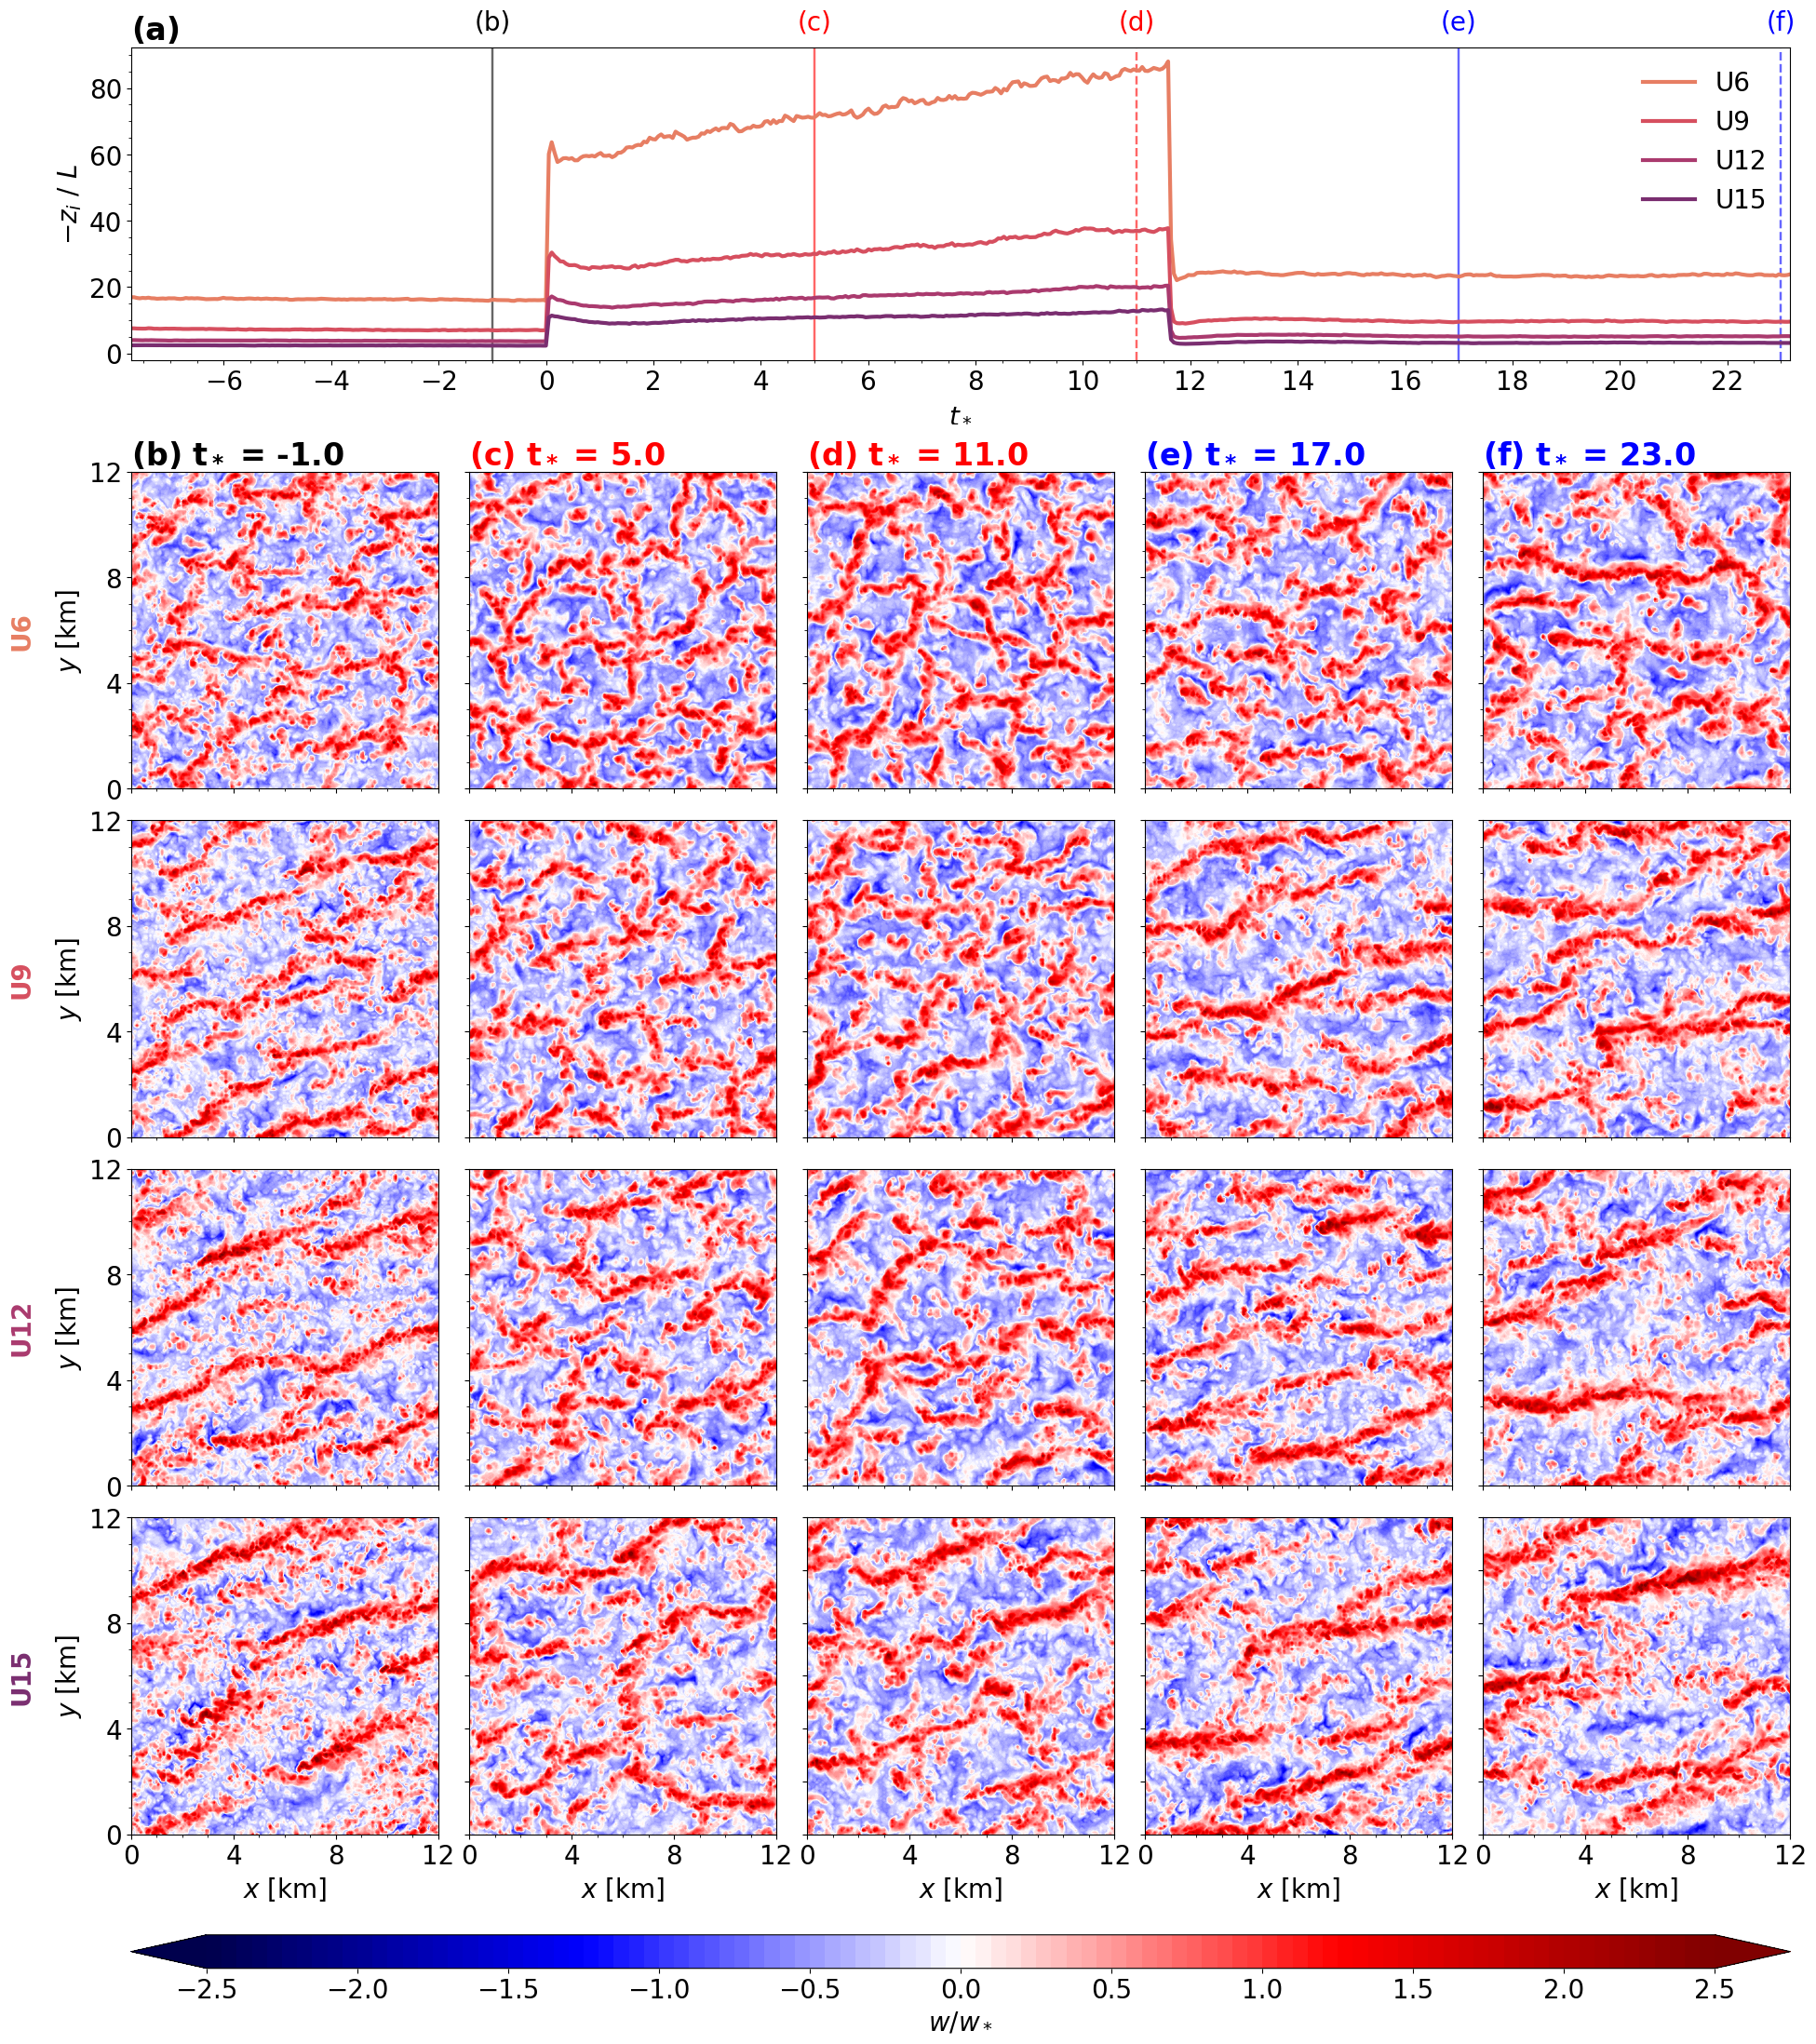

In [8]:
fig = plt.figure(figsize=(23,24))

gs1 = GridSpec(1, 1, bottom=0.74)
ax1 = fig.add_subplot(gs1[:,:])
gs2 = GridSpec(4, 5, top=0.69, bottom=0.08)
ax2 = fig.add_subplot(gs2[0,0])
ax3 = fig.add_subplot(gs2[0,1])
ax4 = fig.add_subplot(gs2[0,2])
ax5 = fig.add_subplot(gs2[0,3])
ax6 = fig.add_subplot(gs2[0,4])
ax7 = fig.add_subplot(gs2[1,0])
ax8 = fig.add_subplot(gs2[1,1])
ax9 = fig.add_subplot(gs2[1,2])
ax10 = fig.add_subplot(gs2[1,3])
ax11 = fig.add_subplot(gs2[1,4])
ax12 = fig.add_subplot(gs2[2,0])
ax13 = fig.add_subplot(gs2[2,1])
ax14 = fig.add_subplot(gs2[2,2])
ax15 = fig.add_subplot(gs2[2,3])
ax16 = fig.add_subplot(gs2[2,4])
ax17 = fig.add_subplot(gs2[3,0])
ax18 = fig.add_subplot(gs2[3,1])
ax19 = fig.add_subplot(gs2[3,2])
ax20 = fig.add_subplot(gs2[3,3])
ax21 = fig.add_subplot(gs2[3,4])
gs3 = GridSpec(1,1, top=0.035, bottom=0.02)
ax22 = fig.add_subplot(gs3[:,:])

# zi/L time series
ug_list = ["6", "9", "12", "15"]
for i, s in enumerate(s_all):
    ax1.plot(((s.time - 10)*3600) / T_L, s.zi_L, c=ug_colors[i], 
             label=f"U{case[i]}", lw=3)
ax1.set_xlim(tlmin,tlmax)
ax1.legend(frameon=False, fontsize=20)
# vertical lines
ax1.axvline(x=tb, lw=1.75, alpha=0.6, ls=linestyle[0], c=time_colors[0], zorder=0)
ax1.axvline(x=tc, lw=1.75, alpha=0.6, ls=linestyle[1], c=time_colors[1], zorder=0)
ax1.axvline(x=td, lw=1.75, alpha=0.6, ls=linestyle[2], c=time_colors[2], zorder=0)
ax1.axvline(x=te, lw=1.75, alpha=0.6, ls=linestyle[3], c=time_colors[3], zorder=0)
ax1.axvline(x=tf, lw=1.75, alpha=0.6, ls=linestyle[4], c=time_colors[4], zorder=0)
# text above lines
ax1.text(tb, 100, "(b)", ha="center", va="center", c=time_colors[0])
ax1.text(tc, 100, "(c)", ha="center", va="center", c=time_colors[1])
ax1.text(td, 100, "(d)", ha="center", va="center", c=time_colors[2])
ax1.text(te, 100, "(e)", ha="center", va="center", c=time_colors[3])
ax1.text(tf, 100, "(f)", ha="center", va="center", c=time_colors[4])
# ticks
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(5))
# axis label
ax1.set_xlabel("$t_*$")
ax1.set_ylabel("$-z_i$ $/$ $L$")
# title
ax1.set_title("(a)", loc="left")

# contourf plots
clevs = np.linspace(-2.5,2.5,101)
# 6 m/s
sim = 0
axes = [ax2, ax3, ax4, ax5, ax6]
time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
lab = ["b", "c", "d", "e", "f"]
for j in range(5):
    jz = abs(s_all[0].z/s_all[0].zi[jtall[j]] - height).argmin()
    cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
                     cmap=mpl.cm.seismic, levels=clevs, extend="both")
    axes[j].xaxis.set_major_locator(MultipleLocator(4))
    axes[j].xaxis.set_minor_locator(MultipleLocator(1))
    axes[j].yaxis.set_major_locator(MultipleLocator(4))
    axes[j].yaxis.set_minor_locator(MultipleLocator(1))
    axes[j].set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", loc="left", c=time_colors[j])
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 9 m/s
sim = 1
axes = [ax7, ax8, ax9, ax10, ax11]
time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
lab = ["g", "h", "i", "j", "k"]
for j in range(5):
    jz = abs(s_all[1].z/s_all[1].zi[jtall[j]] - height).argmin()
    cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
                     cmap=mpl.cm.seismic, levels=clevs, extend="both")
    axes[j].xaxis.set_major_locator(MultipleLocator(4))
    axes[j].xaxis.set_minor_locator(MultipleLocator(1))
    axes[j].yaxis.set_major_locator(MultipleLocator(4))
    axes[j].yaxis.set_minor_locator(MultipleLocator(1))
    # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 12 m/s
sim = 2
axes = [ax12, ax13, ax14, ax15, ax16]
time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
lab = ["l", "m", "n", "o", "p"]
for j in range(5):
    jz = abs(s_all[2].z/s_all[2].zi[jtall[j]] - height).argmin()
    cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
                     cmap=mpl.cm.seismic, levels=clevs, extend="both")
    axes[j].xaxis.set_major_locator(MultipleLocator(4))
    axes[j].xaxis.set_minor_locator(MultipleLocator(1))
    axes[j].yaxis.set_major_locator(MultipleLocator(4))
    axes[j].yaxis.set_minor_locator(MultipleLocator(1))
    # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 15 m/s
sim = 3
axes = [ax17, ax18, ax19, ax20, ax21]
time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
lab = ["q", "r", "s", "t", "u"]
for j in range(5):
    jz = abs(s_all[3].z/s_all[3].zi[jtall[j]] - height).argmin()
    cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
                     cmap=mpl.cm.seismic, levels=clevs, extend="both")
    axes[j].xaxis.set_major_locator(MultipleLocator(4))
    axes[j].xaxis.set_minor_locator(MultipleLocator(1))
    axes[j].set_xlabel("$x$ [km]")
    # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# axis stuff
case = ["6", "9", "12", "15"]
axes = [ax2, ax7, ax12, ax17]
for ax in axes:
    ax.yaxis.set_major_locator(MultipleLocator(4))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylabel("$y$ [km]")
for i, ax in enumerate(axes):
    ax.text(-4.25, 6, f"U{case[i]}", 
            rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
axes = [ax2, ax7, ax12]
for ax in axes:
    ax.set_xticklabels([])
axes = [ax18, ax19, ax20, ax21]
for ax in axes:
    ax.set_yticklabels([])

# Set tick labels to an empty list for inner subplots
for ax in [ax3, ax4, ax5, ax6, ax8, ax9, ax10, ax11, ax13, ax14, ax15, ax16]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

cbar = plt.colorbar(cf, ax22, orientation="horizontal")
cbar.set_ticks([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
cbar.set_label("$w / w_*$")

plt.subplots_adjust(hspace=0.10, wspace=0.1)

plt.savefig(f"{figdir}fig5.pdf", format="pdf", dpi=300, bbox_inches="tight")

## Time series of statistics

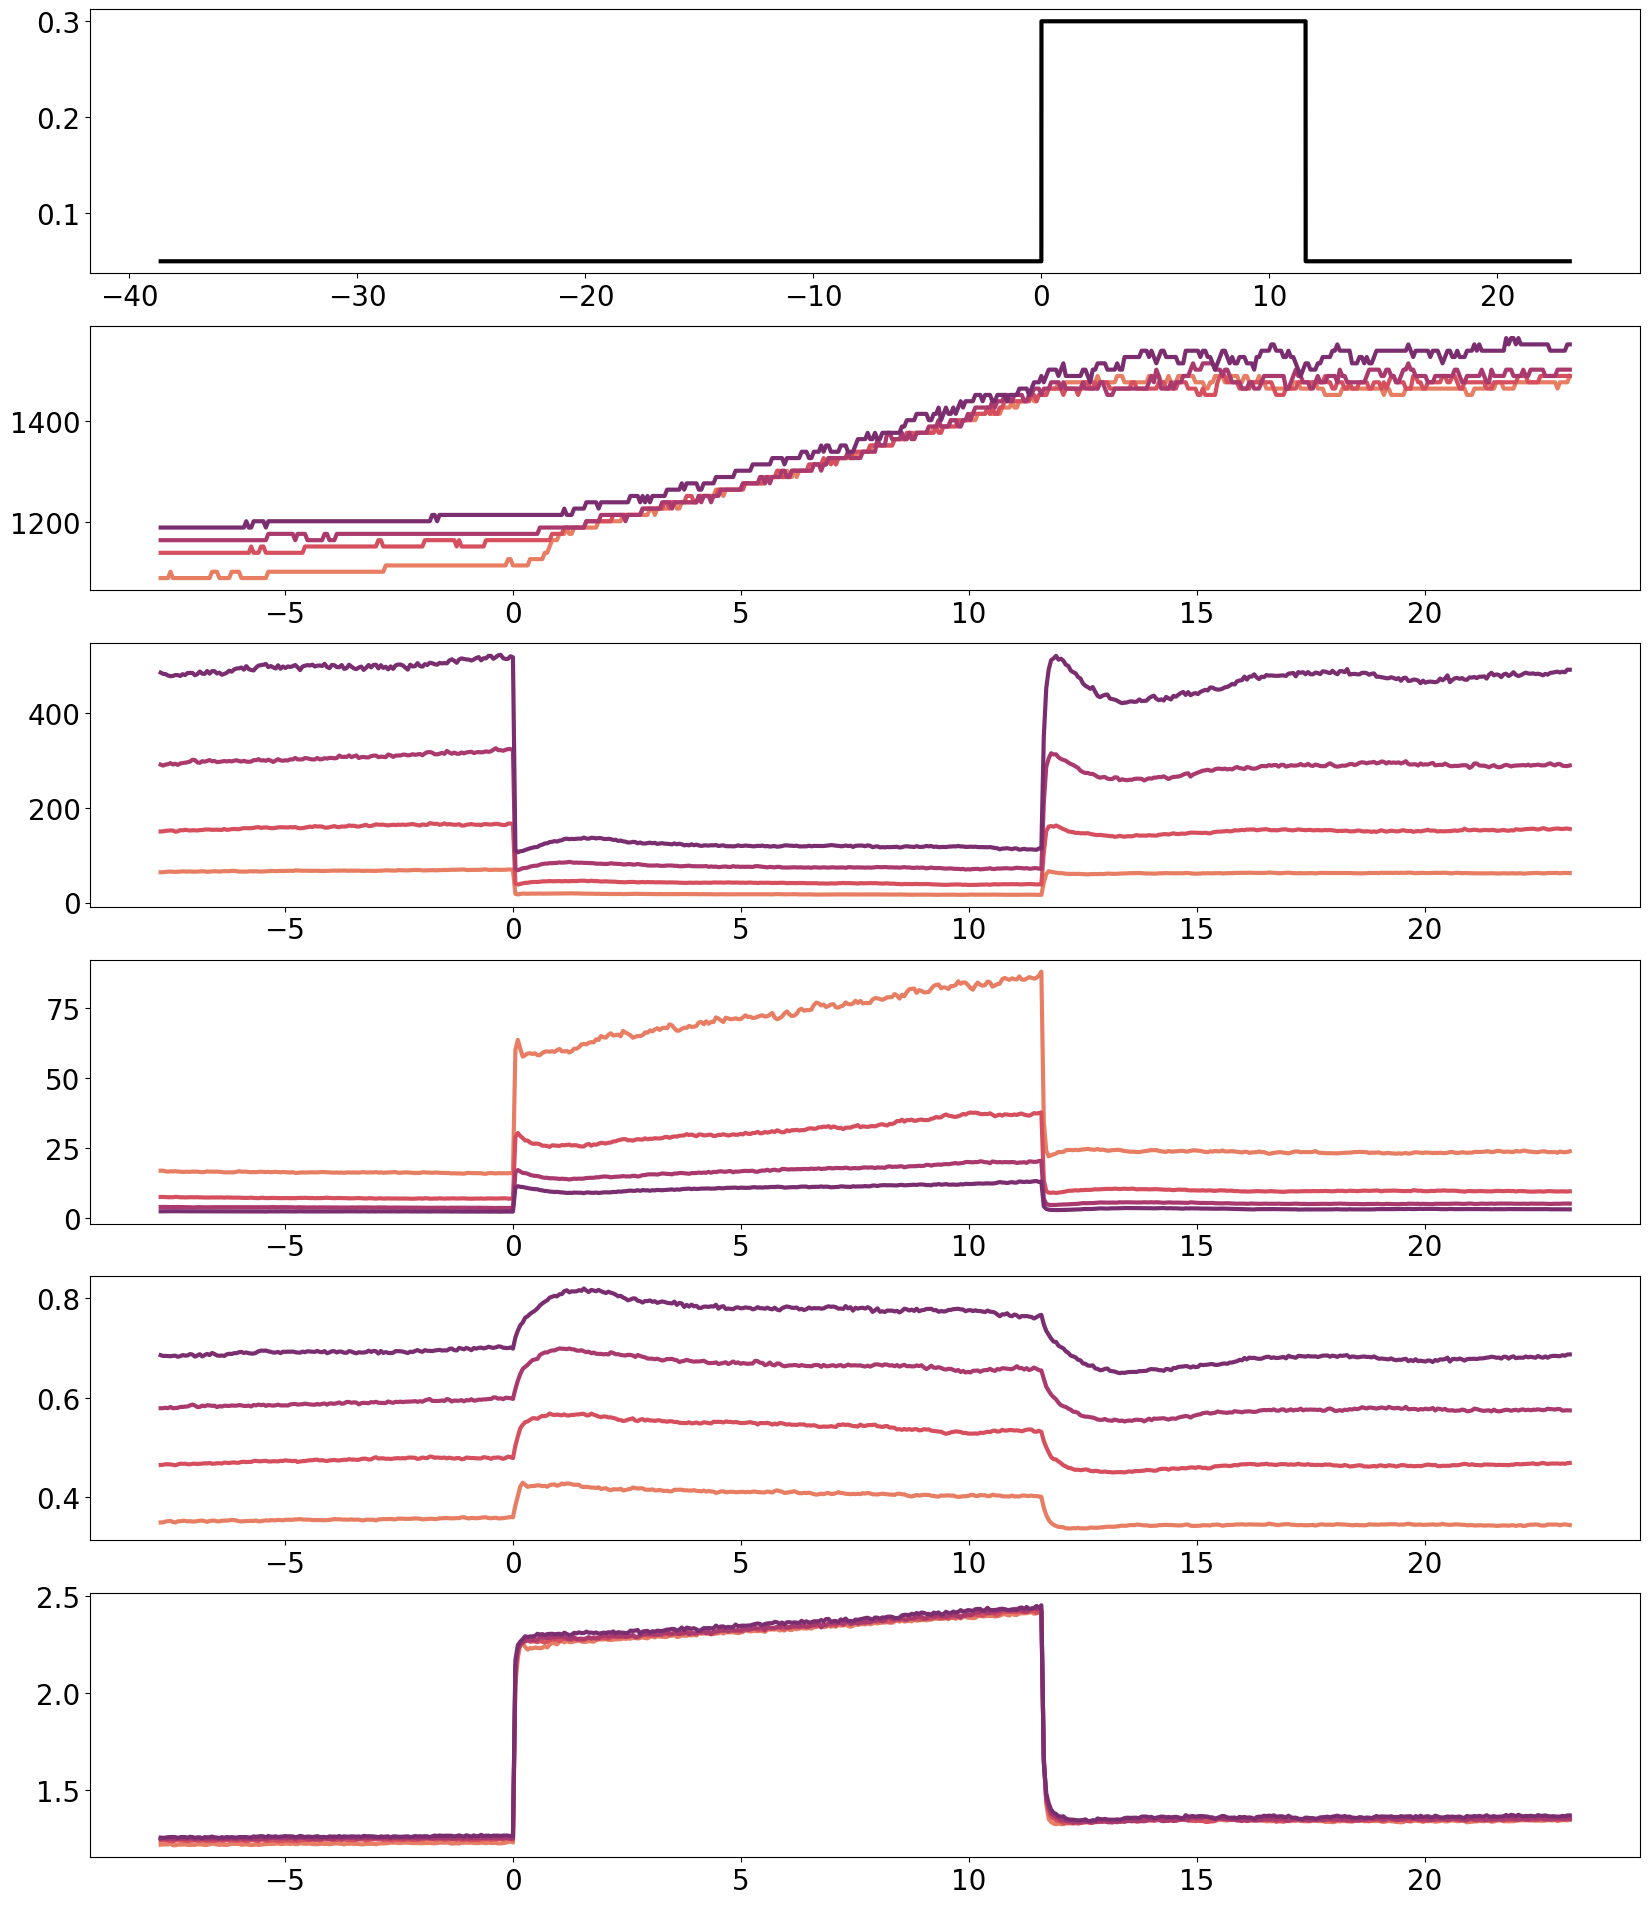

In [17]:
fig, ax = plt.subplots(figsize=(20,24), nrows=6)

ax[0].plot((time-10)*3600/T_L, flux, lw=3, c="black")

for i, s in enumerate(s_all):
    ax[1].plot((s.time-10)*3600/T_L, s.zi, c=ug_colors[i], 
             label=f"U{case[i]}", lw=3)
    ax[2].plot((s.time-10)*3600/T_L, s.L*-1, c=ug_colors[i], 
             label=f"U{case[i]}", lw=3)
    ax[3].plot((s.time-10)*3600/T_L, s.zi_L, c=ug_colors[i], 
             label=f"U{case[i]}", lw=3)
    ax[4].plot((s.time-10)*3600/T_L, s.ustar[:,0], c=ug_colors[i], 
             label=f"U{case[i]}", lw=3)
    ax[5].plot((s.time-10)*3600/T_L, s.wstar, c=ug_colors[i], 
             label=f"U{case[i]}", lw=3)

In [10]:
error

NameError: name 'error' is not defined

## Entrainment time-height series

In [ ]:
# find average T_L at hr 9.8333
T_L = ((906.23 + 923.55 + 937.68 + 960.66) / 4) / 3600
tlmax = max((s_all[0].time-10)/T_L)
tlmin = min((s_all[0].time-10)/T_L)

# extract helpful arrays
time = (s_all[0].time - 10) / T_L
z = s_all[0].z

# find lowest zero value heat flux
negative = np.empty(time.size)
for i, s in enumerate(s_all):
    tw = s.tw_cov_tot.values
    for jt in range(time.size):
        negative[jt] = np.where(tw[jt] <= 0)[0][0]
    s["tw_zero"] = [s.z[negative[jt].astype(int)] for jt in range(time.size)]

### $\langle \theta'w' \rangle$

In [ ]:
clevs = np.linspace(-0.2, 0.2, 50)

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
for collection in cf.collections:
    collection.set_rasterized(True)
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
# 9 m/s
cf = ax2.contourf(time, z, s_all[1].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
for collection in cf.collections:
    collection.set_rasterized(True)
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
# 12 m/s
cf = ax3.contourf(time, z, s_all[2].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
for collection in cf.collections:
    collection.set_rasterized(True)
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.set_xticks([])
# 15 m/s
cf = ax4.contourf(time, z, s_all[3].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
for collection in cf.collections:
    collection.set_rasterized(True)
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(-0.2,0.21,0.05))
cb.set_label("$\\langle \\theta' w' \\rangle$ [K m s$^{-1}$]")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.set_ylabel("$z$ [km]")
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20, c=ug_colors[0])
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20, c=ug_colors[1])
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20, c=ug_colors[2])
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20, c=ug_colors[3])

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [m]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax1.text(0, 1800, "$t_0$", ha="center", va="center", c="red")
ax1.text(3/T_L, 1800, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

plt.savefig(f"{figdir}tw_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

### $\langle \sigma_w \rangle$

In [ ]:
for i, s in enumerate(s_all):
    s["w_var_plot"] = s.w_var / s.wstar[132]

In [ ]:
cmax, cmin = 0, 2
clevs = np.linspace(cmax, cmin, 50)
cmap = cmocean.cm.amp
nx, ny = s_all[0].x.size, s_all[0].y.size

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].w_var_plot.T, clevs,
                  extend="max", cmap=cmap)
for collection in cf.collections:
    collection.set_rasterized(True)
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
# 9 m/s
cf = ax2.contourf(time, z, s_all[1].w_var_plot.T, clevs,
             extend="max", cmap=cmap)
for collection in cf.collections:
    collection.set_rasterized(True)
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
# 12 m/s
cf = ax3.contourf(time, z, s_all[2].w_var_plot.T, clevs,
             extend="max", cmap=cmap)
for collection in cf.collections:
    collection.set_rasterized(True)
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
# 15 m/s
cf = ax4.contourf(time, z, s_all[3].w_var_plot.T, clevs,
             extend="max", cmap=cmap)
for collection in cf.collections:
    collection.set_rasterized(True)
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(cmax,cmin+0.1,1))
cb.set_label("$\\langle \\sigma_w \\rangle / w_*$")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20, c=ug_colors[0])
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20, c=ug_colors[1])
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20, c=ug_colors[2])
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20, c=ug_colors[3])

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [m]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax1.text(0, 1800, "$t_0$", ha="center", va="center", c="red")
ax1.text(3/T_L, 1800, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

plt.savefig(f"{figdir}ww_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

### $B z_i / w_*^3$

In [ ]:
for i, s in enumerate(s_all):
    s["bp"] = (9.81 / s.theta_mean[:,0]) * s.tw_cov_tot
    s["bp_plot"] = s.bp * (s.zi[132] / s.wstar[132] ** 3)

In [ ]:
cmin, cmax = -4, 4
clevs = np.linspace(cmin, cmax, 50)
cmap = cmocean.cm.curl
nx, ny = s_all[0].x.size, s_all[0].y.size

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].bp_plot.T, clevs,
                  extend="both", cmap=cmap)
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
# 9 m/s
ax2.contourf(time, z, s_all[1].bp_plot.T, clevs,
             extend="both", cmap=cmap)
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
# 12 m/s
ax3.contourf(time, z, s_all[2].bp_plot.T, clevs,
             extend="both", cmap=cmap)
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
# 15 m/s
ax4.contourf(time, z, s_all[3].bp_plot.T, clevs,
             extend="both", cmap=cmap)
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(cmin,cmax+0.00001,1))
cb.set_label("$B z_i / w_{*}^{3}$")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20, c=ug_colors[0])
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20, c=ug_colors[1])
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20, c=ug_colors[2])
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20, c=ug_colors[3])

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [m]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax1.text(0, 1800, "$t_0$", ha="center", va="center", c="red")
ax1.text(3/T_L, 1800, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

plt.savefig(f"{figdir}tkeb_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

### Shear production

In [ ]:
T_L = (906.23 + 923.55 + 937.68 + 960.66) / 4

for i, s in enumerate(s_all):
    s["sp"] = -s.uw_cov_tot * s.u_mean.differentiate(coord="z")
    s["sp_plot"] = (s.sp * s.zi[132]) / s.wstar[132] ** 3

T_L = ((906.23 + 923.55 + 937.68 + 960.66) / 4) / 3600

In [ ]:
cmax, cmin = 0, 3
clevs = np.linspace(cmax, cmin, 50)
cmap = cmocean.cm.algae
nx, ny = s_all[0].x.size, s_all[0].y.size

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].sp_plot.T, clevs,
                  extend="both", cmap=cmap)
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
# 9 m/s
ax2.contourf(time, z, s_all[1].sp_plot.T, clevs,
             extend="both", cmap=cmap)
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
# 12 m/s
ax3.contourf(time, z, s_all[2].sp_plot.T, clevs,
             extend="both", cmap=cmap)
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
# 15 m/s
ax4.contourf(time, z, s_all[3].sp_plot.T, clevs,
             extend="both", cmap=cmap)
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(cmax,cmin+0.00001,1))
cb.set_label("Shear Production")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20, c=ug_colors[0])
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20, c=ug_colors[1])
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20, c=ug_colors[2])
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20, c=ug_colors[3])

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [m]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax1.text(0, 1800, "$t_0$", ha="center", va="center", c="red")
ax1.text(3/T_L, 1800, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

# plt.savefig(f"{figdir}tkes_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

### TKE

In [ ]:
for i, s in enumerate(s_all):
    s["tke_plot"] = s.tke / s.wstar[132] ** 2

In [ ]:
cmax, cmin = 0, 2
clevs = np.linspace(cmax, cmin, 50)
cmap = cmocean.cm.dense
nx, ny = s_all[0].x.size, s_all[0].y.size

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].tke_plot.T, clevs,
                  extend="max", cmap=cmap)
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
# 9 m/s
ax2.contourf(time, z, s_all[1].tke_plot.T, clevs,
             extend="max", cmap=cmap)
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
# 12 m/s
ax3.contourf(time, z, s_all[2].tke_plot.T, clevs,
             extend="max", cmap=cmap)
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
# 15 m/s
ax4.contourf(time, z, s_all[3].tke_plot.T, clevs,
             extend="max", cmap=cmap)
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(cmax,cmin+0.00001,1))
cb.set_label("TKE / $w_*^2$")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20, c=ug_colors[0])
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20, c=ug_colors[1])
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20, c=ug_colors[2])
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20, c=ug_colors[3])

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [m]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax1.text(0, 1800, "$t_0$", ha="center", va="center", c="red")
ax1.text(3/T_L, 1800, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

# plt.savefig(f"{figdir}tkes_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

### $z_i$ timeseries

In [ ]:
fig, ax = plt.subplots(figsize=(14,9), nrows=2, sharex=True, sharey=True)

for i, s in enumerate(s_all):
    idx = s.tw_cov_tot.argmin(axis=1)
    zi = s.z[idx]

    # ax[0].plot(time, zi.rolling(time=6).mean(), c=ug_colors[i], label=f"U{ug_list[i]}")
    # ax[1].plot(time, s.zi.rolling(time=6).mean(), c=ug_colors[i])
    ax[0].plot(time, zi, c=ug_colors[i], label=f"U{ug_list[i]}")
    ax[1].plot(time, s.zi, c=ug_colors[i])

ax[0].legend(frameon=False, loc="upper left", fontsize=17)

for i, iax in enumerate(ax):
    iax.set_xlim(-5,20)

    iax.yaxis.set_minor_locator(MultipleLocator(100))
    iax.xaxis.set_major_locator(MultipleLocator(5))
    iax.xaxis.set_minor_locator(MultipleLocator(1))

    iax.set_ylabel("$z_i$ [m]")

    iax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    iax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax[0].set_title("(a) min$\\bf{[\\langle \\theta'w'(t,z) \\rangle]}$", loc="left")
ax[1].set_title("(b) max$\\bf{ \\left[ \\frac{\partial \\langle \\theta(t) \\rangle}{\partial z} \\right]}$", loc="left")
# ax[1].set_title("(b) max$\\bf{ [\partial \\langle \\theta(t) \\rangle / \partial z]}$", loc="left")

ax[1].set_ylim(800, 1600)
ax[1].set_xlabel("$t_*$")

ax[1].text(0-0.55, 900, "$t_0$", ha="center", va="center", c="red")
ax[1].text(3/T_L+0.55, 900, "$t_1$", ha="center", va="center", c="blue")

plt.subplots_adjust(hspace=0.25)

plt.savefig(f"{figdir}zi_ts.pdf", format="pdf", dpi=300, bbox_inches="tight")

### Print values for table 1 in manuscript

In [ ]:
sims = [0,1,2,3] # 0 = 6 m/s, 1 = 9 m/s, and so on
ugs = [6, 9, 12, 15]
jthr = [9.83333, 12.83333]
jt = abs(s_all[sim].time.values - jthr[t]).argmin()

for sim in sims:
    jt = abs(s_all[sim].time.values - jthr[0]).argmin()
    ug = f"{ugs[sim]}"
    L = f"{round(abs(s_all[sim].L.isel(time=jt).values),2)}"
    zi_L = f"{round(float(s_all[sim].zi_L.isel(time=jt).values),2)}" 
    u_star = f"{round(float(s_all[sim].ustar0.isel(time=jt).values),2)}"
    w_star = f"{round(float(s_all[sim].wstar.isel(time=jt).values),2)}"
    T_L = f"{round(float(s_all[sim].zi.isel(time=jt).values/s_all[sim].wstar.isel(time=jt).values),2)}"
    print(f"sim{sim}, t0 \n")
    print(f"{ug} & U{ug} & 0.05 & {L} & {zi_L} & {u_star} & {w_star} & {T_L} \n")

    jt = abs(s_all[sim].time.values - jthr[1]).argmin()
    ug = f"{ugs[sim]}"
    L = f"{round(abs(s_all[sim].L.isel(time=jt).values),2)}"
    zi_L = f"{round(float(s_all[sim].zi_L.isel(time=jt).values),2)}" 
    u_star = f"{round(float(s_all[sim].ustar0.isel(time=jt).values),2)}"
    w_star = f"{round(float(s_all[sim].wstar.isel(time=jt).values),2)}"
    T_L = f"{round(float(s_all[sim].zi.isel(time=jt).values/s_all[sim].wstar.isel(time=jt).values),2)}"
    print(f"sim{sim}, t1 \n")
    print(f"{ug} & U{ug} & 0.05 & {L} & {zi_L} & {u_star} & {w_star} & {T_L} \n")